# Введение

Проблема -> Data engineering -> Machine Learning -> Programming -> Analytics = Data Science

Задача -> Data preparation -> Machine Learning -> Validation = Machine Learning

Примеры задач классификации и регрессии

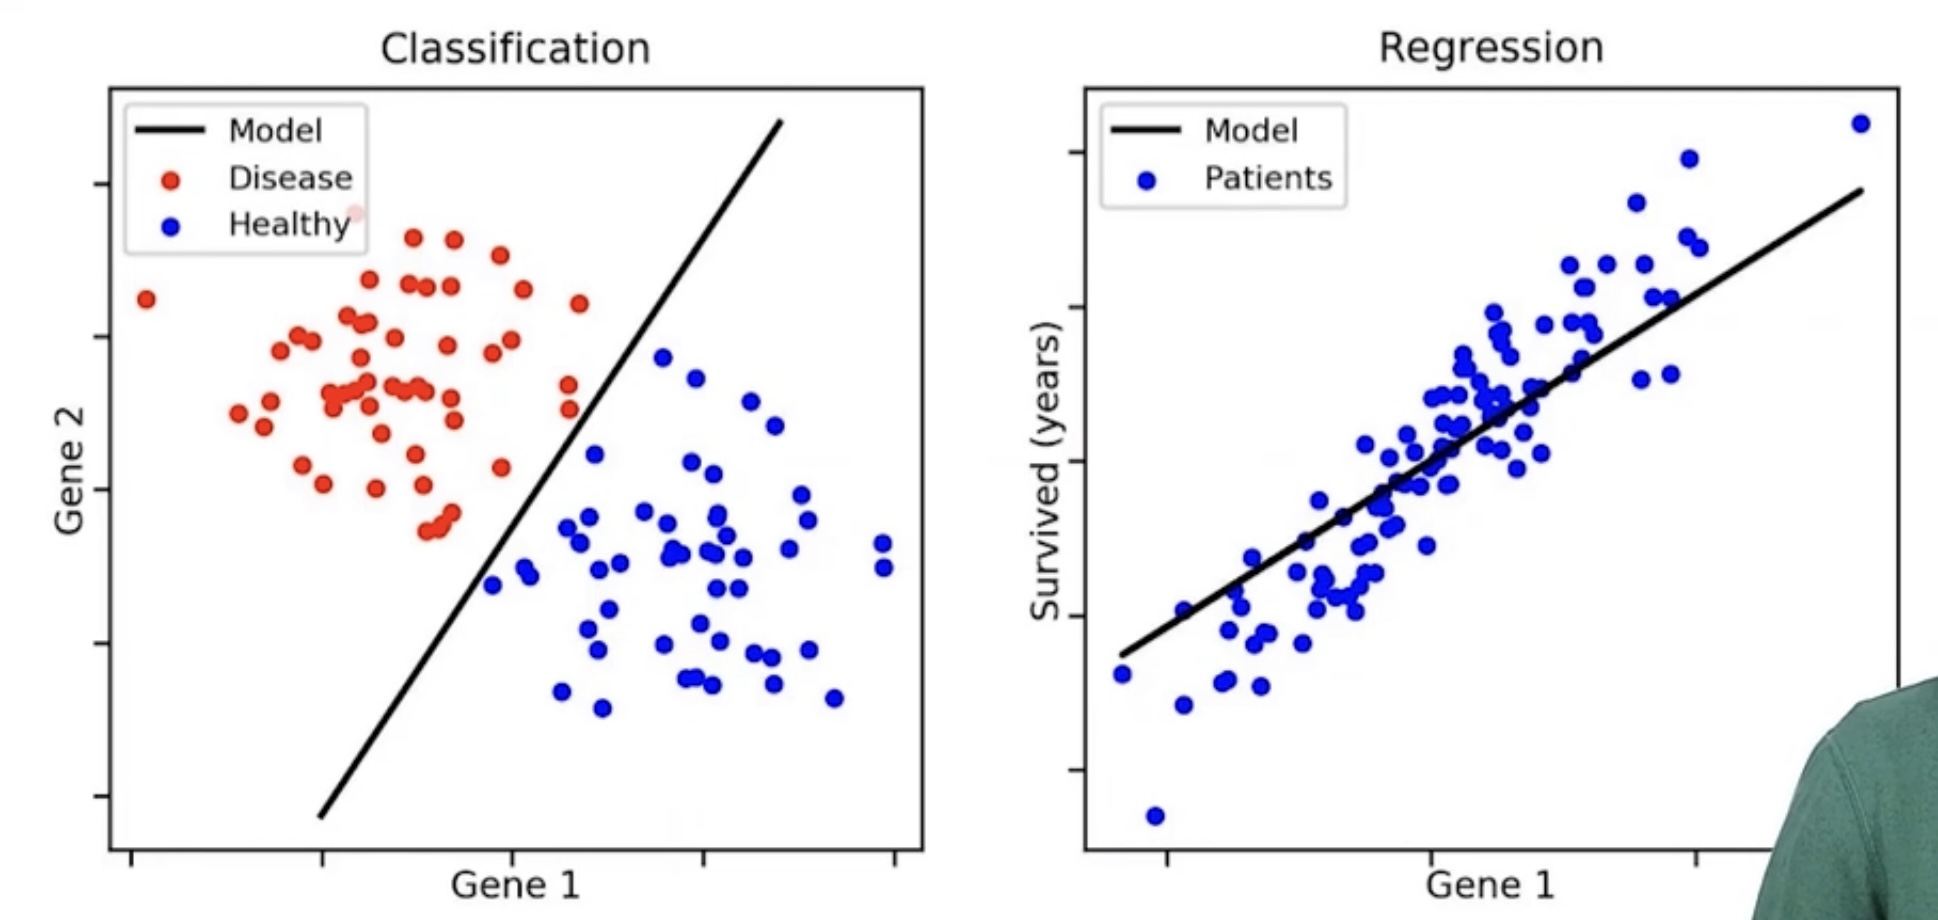

Регрессия и RSS

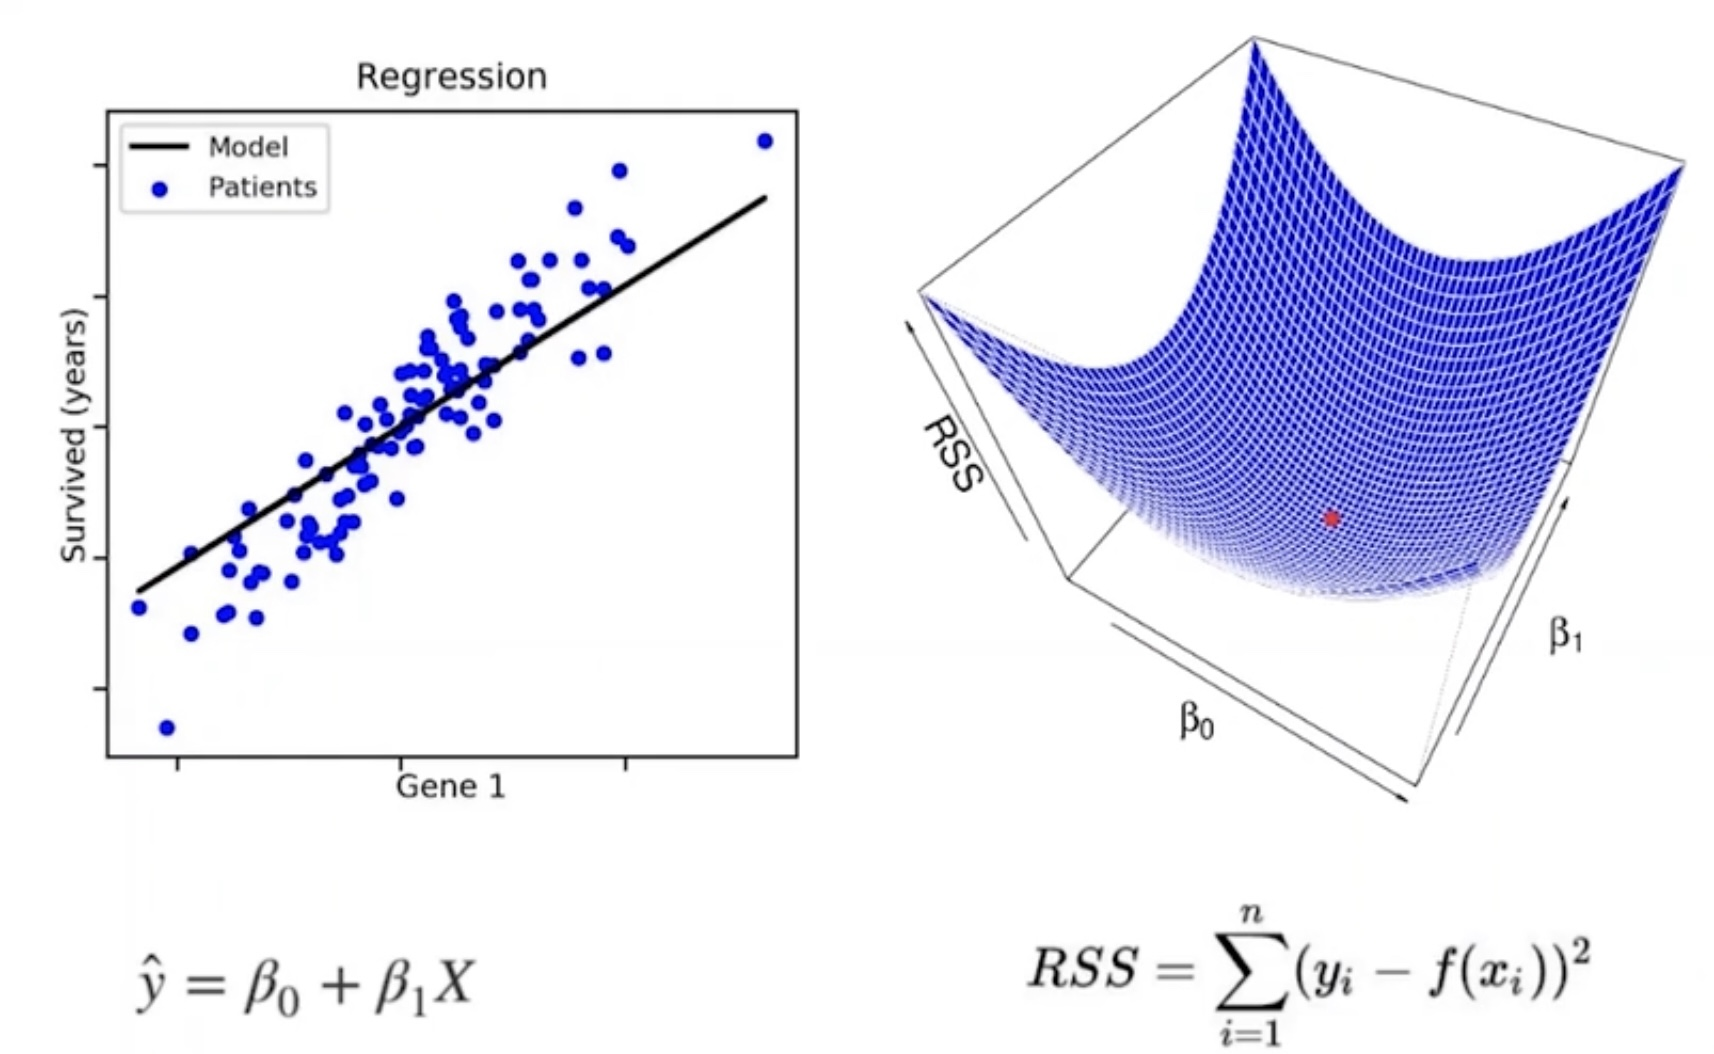

## Pandas, DataFrame

In [8]:
import pandas as pd
import numpy as np

In [9]:
students_performance = pd.read_csv('StudentsPerformance.csv')

In [13]:
students_performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
students_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
students_performance.shape

(1000, 8)

In [7]:
students_performance.groupby('gender').aggregate({'writing score' : 'mean'})

,writing score
gender,
female,72.467181
male,63.311203


In [8]:
students_performance.groupby('gender').aggregate({'writing score' : 'mean', 'math score' : 'mean'})

,writing score,math score
gender,,
female,72.467181,63.633205
male,63.311203,68.728216


In [10]:
students_performance.groupby('gender').aggregate({'race/ethnicity' : 'count'})

,race/ethnicity
gender,
female,518
male,482


In [11]:
students_performance.size

8000

In [13]:
students_performance.iloc[2]

gender                                  female
race/ethnicity                         group B
parental level of education    master's degree
lunch                                 standard
test preparation course                   none
math score                                  90
reading score                               95
writing score                               93
Name: 2, dtype: object

In [16]:
students_performance.iloc[0:5, 0:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [17]:
students_performance.iloc[[0, 3, 10], [0, -3, -2, -1]]

,gender,math score,reading score,writing score
0,female,72,72,74
3,male,47,57,44
10,male,58,54,52


In [25]:
students_performance.loc[[0, 2, 9], ['gender', 'math score', 'reading score']] # использует именно ИМЯ строки

,gender,math score,reading score
0,female,72,72
2,female,90,95
9,female,38,60


In [26]:
students_performance.iloc[:, 0] # type = pd.Series

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [29]:
type(students_performance['gender'])

pandas.core.series.Series

In [30]:
type(students_performance[['gender']])

pandas.core.frame.DataFrame

# Фильтрация

In [31]:
students_performance.gender == 'female'

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997     True
998     True
999     True
Name: gender, Length: 1000, dtype: bool

In [32]:
students_performance[students_performance.gender == 'female']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [34]:
students_performance.loc[students_performance.gender == 'male', ['gender', 'math score']]

,gender,math score
3,male,47
4,male,76
7,male,40
8,male,64
10,male,58
...,...,...
985,male,57
987,male,81
990,male,86
994,male,63


In [37]:
mean_writing_score = students_performance['writing score'].mean()
mean_writing_score

68.054

In [38]:
students_performance[students_performance['writing score'] > mean_writing_score]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [39]:
query = (students_performance['writing score'] > mean_writing_score) & (students_performance.gender == 'female')

In [41]:
students_performance.loc[query].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [52]:
students_performance.loc[students_performance.lunch == 'free/reduced', ['lunch']].count()

lunch    355
dtype: int64

In [53]:
students_performance.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [68]:
students_performance.loc[students_performance['lunch'] == 'standard', 
                         ['math score', 'reading score', 'writing score']].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [69]:
students_performance.loc[students_performance['lunch'] == 'free/reduced', 
                         ['math score', 'reading score', 'writing score']].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [14]:
students_performance = students_performance.rename(columns = {
                                                    'parental level of education' : 'parental_level_of_education',
                                                    'test preparation course' : 'test_preparation_course',
                                                    'math score' : 'math_score', 
                                                    'reading score' : 'reading_score',
                                                    'writing score' : 'writing_score'})

In [76]:
students_performance

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [77]:
students_performance.query("writing_score > 74")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [78]:
students_performance.query("gender == 'female'")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [79]:
students_performance.query("gender == 'female' & writing_score > 78")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
989,female,group D,some college,free/reduced,completed,67,86,83
995,female,group E,master's degree,standard,completed,88,99,95


In [84]:
column_table = students_performance[['writing_score']]
students_performance.query("@column_table > 78")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
writing_score_query = 78
students_performance.query("writing_score > @writing_score_query")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
989,female,group D,some college,free/reduced,completed,67,86,83
995,female,group E,master's degree,standard,completed,88,99,95


In [87]:
score = [i for i in list(students_performance) if 'score' in i]
score

['math_score', 'reading_score', 'writing_score']

In [88]:
students_performance[score].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [89]:
students_performance.filter(like='score')

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


# Группировка и агрегация данных

In [91]:
# применяемо только для одной стаитистики
students_performance.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [93]:
# метод aggregate() позволяет запросить словарь статистик
students_performance.groupby('gender').aggregate({'math_score' : 'mean', 'reading_score': 'mean'})

,math_score,reading_score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


In [109]:
mean_scores = students_performance.groupby(['gender', 'race/ethnicity']) \
    .aggregate({'math_score' : 'mean', 'reading_score': 'mean'})
# в данном Дата Фрейме находится мульти-индекс
mean_scores

math_score  reading_score
gender race/ethnicity                           
female group A          58.527778      69.000000
       group B          61.403846      71.076923
       group C          62.033333      71.944444
       group D          65.248062      74.046512
       group E          70.811594      75.840580
male   group A          63.735849      61.735849
       group B          65.930233      62.848837
       group C          67.611511      65.424460
       group D          69.413534      66.135338
       group E          76.746479      70.295775

In [110]:
mean_scores.index

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [111]:
students_performance.groupby(['gender', 'race/ethnicity'], as_index=False) \
    .aggregate({'math_score' : 'mean', 'reading_score': 'mean'})

,gender,race/ethnicity,math_score,reading_score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [112]:
# работа мульти-индексом
mean_scores.loc[[('female', 'group A'), ('female', 'group B')]]

math_score  reading_score
gender race/ethnicity                           
female group A          58.527778      69.000000
       group B          61.403846      71.076923

In [113]:
# выводим все уникальные значения столбца math_score
students_performance.math_score.unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

In [115]:
# считаем количество всех уникальных значений столбца math_score
students_performance.math_score.nunique()

81

In [117]:
# выведем число уникальных значений по math_score на пересечении двух групп gender и race/ethnicity
students_performance.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

In [119]:
# отсортируем данные по двум переменным
# ascending=False  делает сортировку от большего к меньшему
students_performance.sort_values(['gender', 'math_score'], ascending=False)\
            .groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [123]:
# добавим новый столбец в датафрейм
students_performance['total_score'] = students_performance.math_score + students_performance.reading_score + students_performance.writing_score

In [124]:
students_performance = students_performance.assign(total_score_log = np.log(students_performance.total_score))

In [125]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


In [126]:
# удалим столбец
# axis = 1 означает название колонки, а не строчек
students_performance.drop(['total_score'], axis=1)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,5.384495
1,female,group C,some college,standard,completed,69,90,88,5.509388
2,female,group B,master's degree,standard,none,90,95,93,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,4.997212
4,male,group C,some college,standard,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,5.273000
998,female,group D,some college,standard,completed,68,78,77,5.407172


## Exercise

In [1]:
import pandas as pd

In [2]:
dota = pd.read_csv('dota_hero_stats.csv')

In [3]:
dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [4]:
dota.legs.unique()

array([2, 4, 0, 6, 8])

In [12]:
dota.groupby(['legs']).count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [18]:
dota.groupby(['attack_type', 'primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

In [13]:
account = pd.read_csv('accountancy.csv')

In [14]:
account.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [17]:
account.sort_values(['Salary']).groupby(['Executor', 'Type']).mean()

Unnamed: 0      Salary
Executor Type                        
Loopa    A      46.000000   58.000000
         B      24.000000  145.166667
         C      31.666667  154.333333
         D      31.857143  137.714286
         E      23.500000  164.000000
         F      20.000000  238.000000
Pupa     A      16.000000  160.833333
         B      41.000000   77.000000
         C      23.000000   74.500000
         D      14.000000  146.500000
         E      19.800000  131.200000
         F      25.750000  136.250000

In [19]:
algae = pd.read_csv('algae.csv')

In [20]:
algae.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [21]:
algae.group.unique()

array(['brown', 'green', 'red'], dtype=object)

In [22]:
algae.genus.unique()

array(['Fucus', 'Saccharina', 'Cladophora', 'Palmaria', 'Ascophyllum'],
      dtype=object)

In [23]:
algae.groupby(['group', 'genus']).mean()

sucrose    alanin   citrate   glucose  oleic_acid
group genus                                                          
brown Ascophyllum  6.825467  0.875429  5.253527  3.414961    2.432526
      Fucus        4.355112  3.566411  4.214878  2.814803    3.367647
      Saccharina   4.183596  3.524207  3.346710  4.980594    4.487252
green Cladophora   4.008792  3.997055  5.288311  2.800276    2.263472
red   Palmaria     0.704580  3.176440  5.573905  3.242090    2.245538

In [33]:
algae.groupby(['group', 'genus']).aggregate({'alanin': 'mean', 'alanin': 'min', 'alanin' : 'max', })

alanin
group genus                
brown Ascophyllum  0.875429
      Fucus        6.641303
      Saccharina   5.793163
green Cladophora   6.881024
red   Palmaria     3.176440

In [37]:
algae.groupby(['group', 'genus'])['alanin'].describe()

count      mean       std       min       25%       50%  \
group genus                                                                  
brown Ascophyllum    1.0  0.875429       NaN  0.875429  0.875429  0.875429   
      Fucus          3.0  3.566411  3.149943  0.346431  2.028965  3.711498   
      Saccharina     2.0  3.524207  3.208789  1.255251  2.389729  3.524207   
green Cladophora     3.0  3.997055  2.657050  1.648450  2.555071  3.461692   
red   Palmaria       1.0  3.176440       NaN  3.176440  3.176440  3.176440   

                        75%       max  
group genus                            
brown Ascophyllum  0.875429  0.875429  
      Fucus        5.176401  6.641303  
      Saccharina   4.658685  5.793163  
green Cladophora   5.171358  6.881024  
red   Palmaria     3.176440  3.176440

In [39]:
algae.groupby(['group'])['citrate'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
brown,6.0,4.098597,2.338577,1.071920,2.163641,5.128895,5.529506,6.423606
green,3.0,5.288311,1.987489,3.082826,4.462173,5.841520,6.391054,6.940588
red,1.0,5.573905,NaN,5.573905,5.573905,5.573905,5.573905,5.573905


# Matplotlib and Seaborn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

<AxesSubplot:>

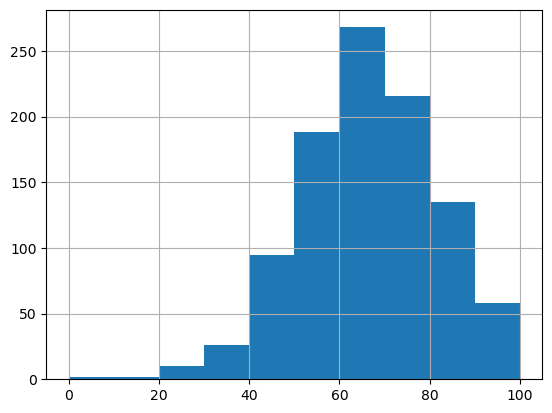

In [15]:
# стандартная гистограмма от pandas
students_performance.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

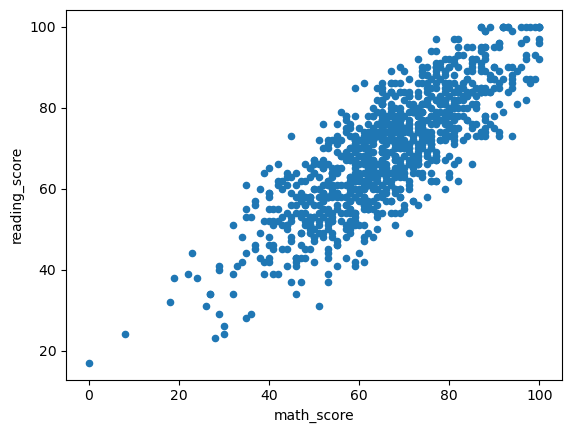

In [16]:
# построим скаттер плот
students_performance.plot.scatter(x='math_score', y='reading_score')

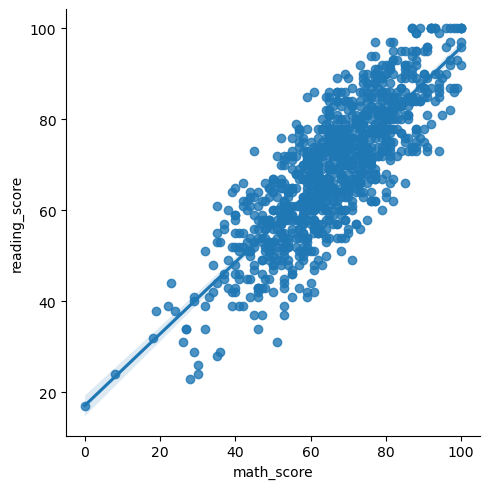

In [17]:
# псотроим скаттер плот от библиотеки seaborn
sns.lmplot(x='math_score', y='reading_score', data=students_performance)

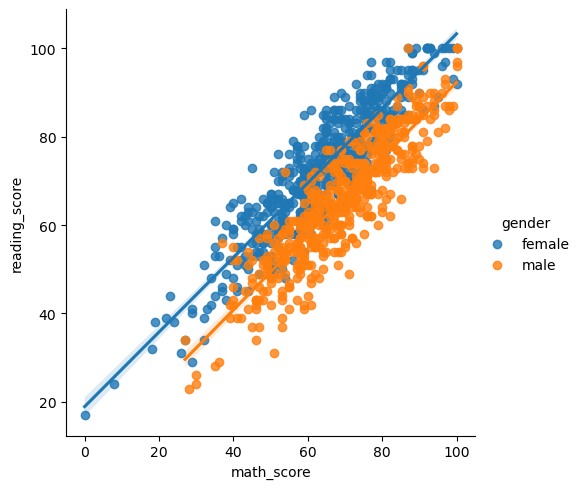

In [18]:
# разделим на группы мудчины и женщины
sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance)

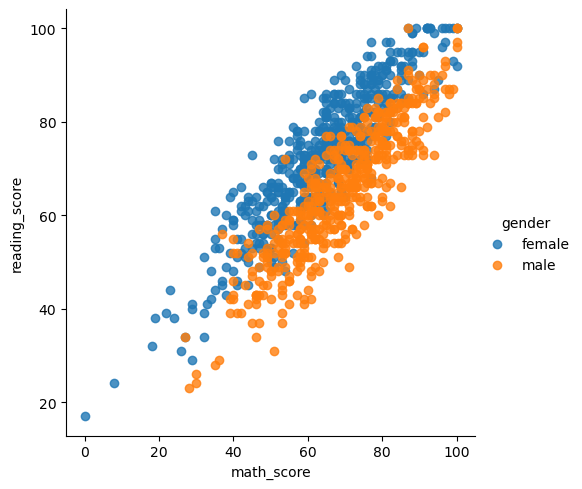

In [19]:
# без линии регрессии
sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance, fit_reg=False)

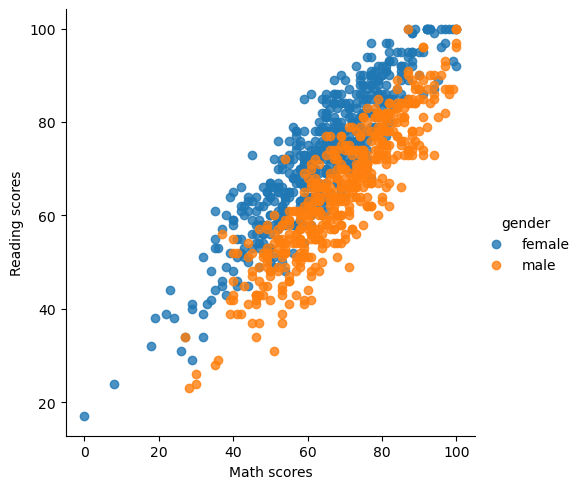

In [23]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance, fit_reg=False)
ax.set_xlabels('Math scores')
ax.set_ylabels('Reading scores')

## Exercise

In [27]:
df = pd.DataFrame({'Income' : [3000, 4000, 5000, 3000, 4000, 3400, 5900, 4000]}, index=['01.01.2023', '01.02.2023', '01.03.2023', 
                                                                       '01.04.2023', '01.05.2023', '01.06.2023', 
                                                                       '01.07.2023', '01.08.2023'])
df

,Income
01.01.2023,3000
01.02.2023,4000
01.03.2023,5000
01.04.2023,3000
01.05.2023,4000
01.06.2023,3400
01.07.2023,5900
01.08.2023,4000


<AxesSubplot:>

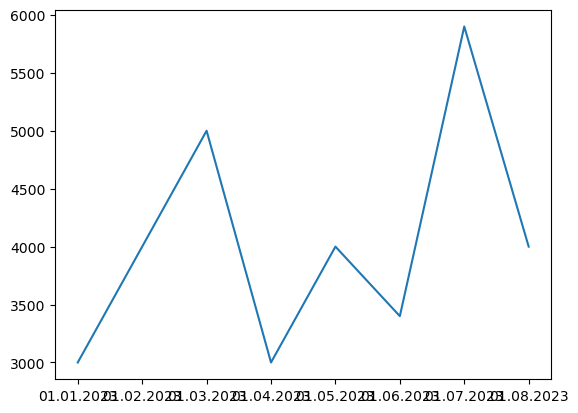

In [25]:
sns.lineplot(data=df)

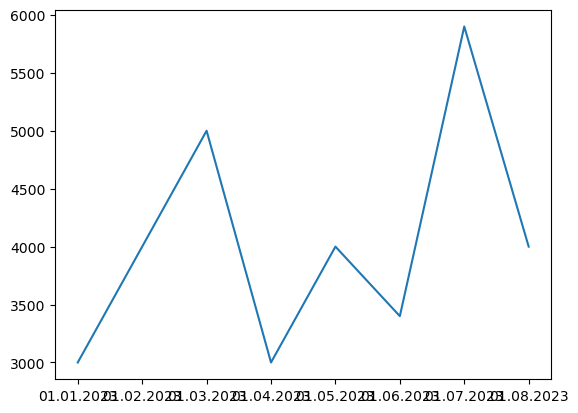

In [29]:
plt.plot(df.index, df.Income)

<AxesSubplot:>

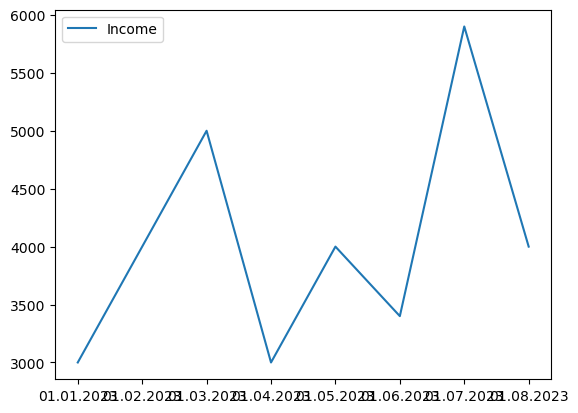

In [30]:
df.plot()

<AxesSubplot:ylabel='Income'>

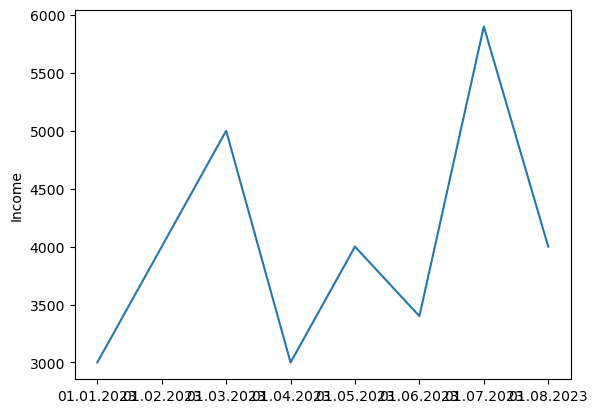

In [31]:
sns.lineplot(x=df.index, y=df.Income)

<AxesSubplot:>

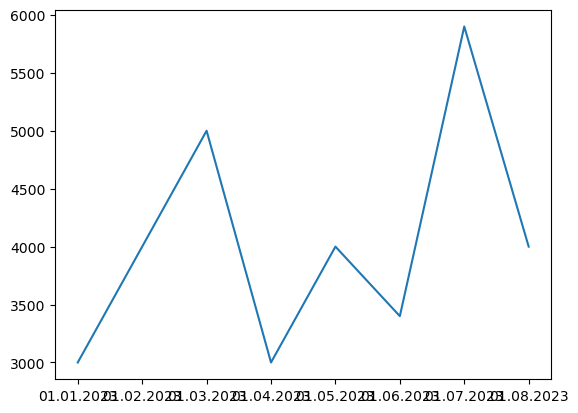

In [32]:
df['Income'].plot()

<AxesSubplot:>

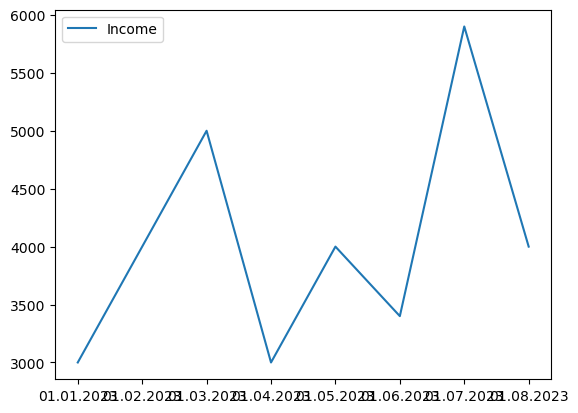

In [33]:
df.plot(kind='line')

<AxesSubplot:>

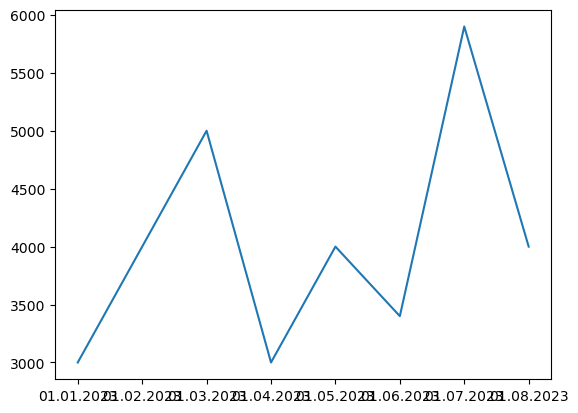

In [35]:
df.Income.plot()

In [36]:
matrix = pd.read_csv('genome_matrix.csv')

In [37]:
matrix.head()

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109


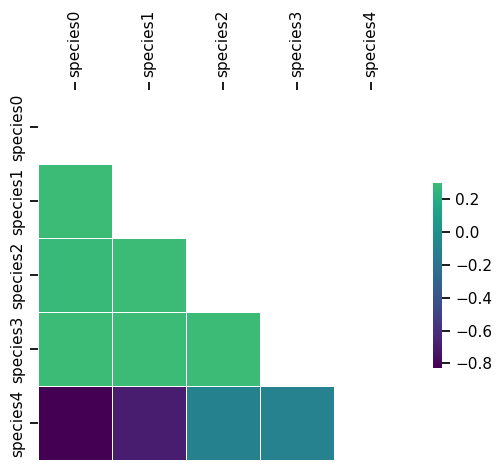

In [48]:
# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, mask=mask, cmap='viridis', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [74]:
dt = pd.read_csv('dota_hero_stats.csv', index_col='id')

In [75]:
dt.head()

,Unnamed: 0,attack_type,legs,localized_name,name,primary_attr,roles
id,,,,,,,
1,0,Melee,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
2,1,Melee,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
3,2,Ranged,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
4,3,Melee,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
5,4,Ranged,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [97]:
num_roles = []
for i in range(len(dt.roles)):
    x = len(dt.roles.iloc[i].split(','))
    num_roles.append(x)
    
print(num_roles)

[3, 4, 4, 5, 4, 3, 4, 3, 5, 5, 2, 4, 4, 4, 4, 6, 5, 5, 6, 5, 5, 1, 6, 4, 4, 5, 5, 4, 3, 2, 3, 4, 3, 2, 4, 3, 4, 3, 5, 5, 5, 4, 2, 2, 2, 4, 3, 6, 3, 4, 5, 5, 5, 4, 3, 3, 5, 3, 5, 4, 2, 2, 4, 4, 3, 3, 3, 5, 4, 5, 3, 6, 5, 5, 3, 5, 5, 4, 4, 5, 6, 5, 5, 4, 3, 4, 4, 6, 4, 3, 5, 4, 3, 4, 5, 4, 3, 4, 3, 3, 3, 4, 5, 2, 5, 5, 5, 3, 5, 4, 3, 3, 4, 4, 6, 4, 4]


In [98]:
dt['num_roles'] = num_roles

In [99]:
dt.head()

,Unnamed: 0,attack_type,legs,localized_name,name,primary_attr,roles,num_roles
id,,,,,,,,
1,0,Melee,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
2,1,Melee,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
3,2,Ranged,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
4,3,Melee,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
5,4,Ranged,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


In [101]:
dt.num_roles.unique()

array([3, 4, 5, 2, 6, 1])

In [103]:
dt.groupby('num_roles').count()

,Unnamed: 0,attack_type,legs,localized_name,name,primary_attr,roles
num_roles,,,,,,,
1,1,1,1,1,1,1,1
2,9,9,9,9,9,9,9
3,28,28,28,28,28,28,28
4,38,38,38,38,38,38,38
5,33,33,33,33,33,33,33
6,8,8,8,8,8,8,8


In [104]:
iris = pd.read_csv('iris.csv')
iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


<AxesSubplot:ylabel='Density'>

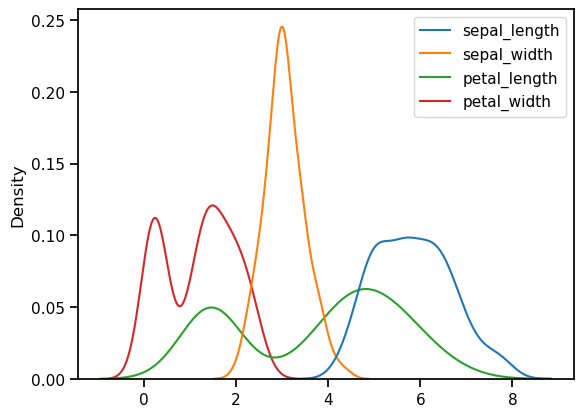

In [113]:
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
# https://seaborn.pydata.org/generated/seaborn.distplot.html
iris = sns.load_dataset("iris")
sns.kdeplot(data=iris)

<AxesSubplot:xlabel='petal_length'>

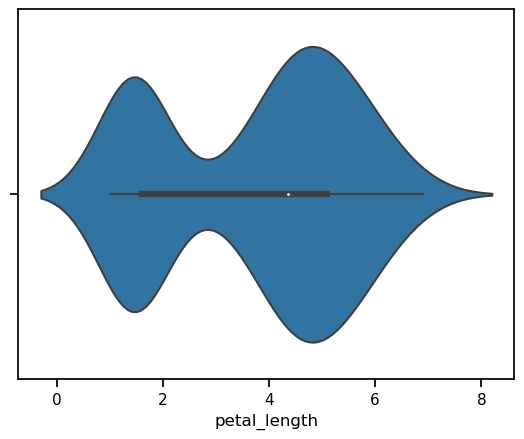

In [115]:
# violin плот - https://seaborn.pydata.org/generated/seaborn.violinplot.html
df = sns.load_dataset("iris")
sns.violinplot(x=df["petal_length"])

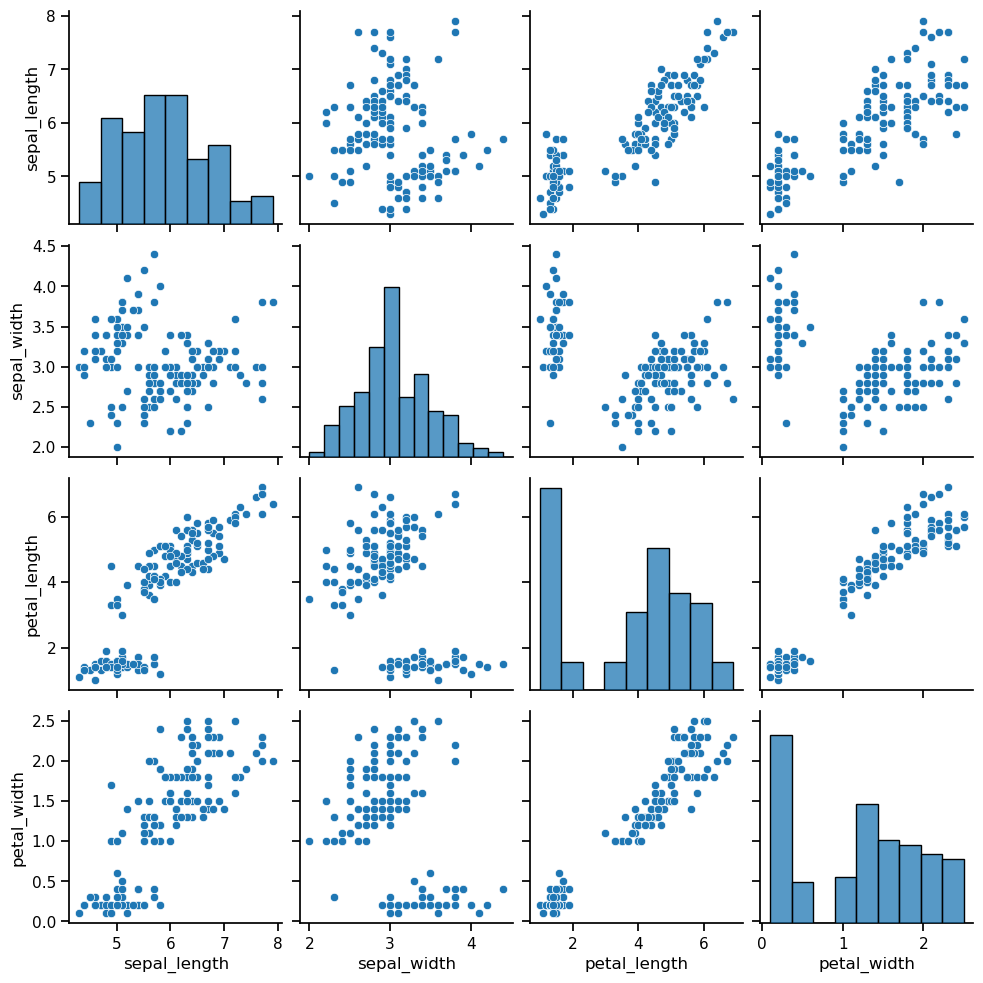

In [116]:
# pairplot - отражает зависимость пар переменных друг от друга, а также распределение каждой их них.
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

iris = sns.load_dataset("iris")
sns.pairplot(iris)

<AxesSubplot:xlabel='x', ylabel='y'>

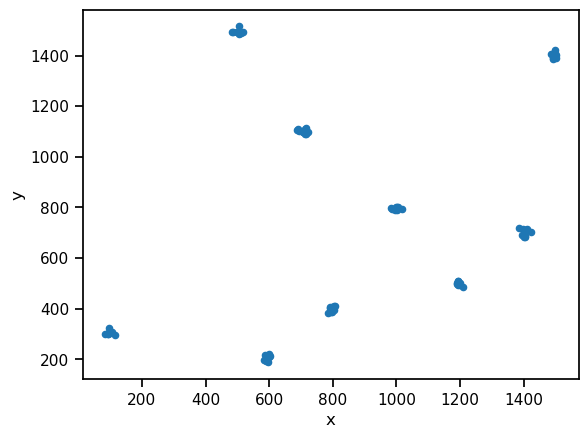

In [120]:
df = pd.read_csv('/Users/Vadim/Downloads/dataset_209770_6.txt', sep=' ')
df.plot.scatter(x='x', y='y')

In [131]:
my_stat = pd.read_csv('my_stat.csv')
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [133]:
subset_1 = my_stat.iloc[:10, [0,2]]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [137]:
my_stat.iloc[[0,4]]

,V1,V2,V3,V4
0,2,13.0,B,1.0
4,0,10.0,B,-1.0


In [140]:
subset = my_stat.copy()
sb = subset.drop([0, 4])
subset_2 = sb.iloc[:, [1,3]]
subset_2

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [149]:
subset_1 = my_stat[(my_stat.V1 > 0) & (my_stat.V3 == 'A')]
type(subset_1)

pandas.core.frame.DataFrame

In [150]:
subset_1[:20]

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
21,3,10.0,A,2.0
25,2,10.0,A,3.0
26,2,12.0,A,1.0
27,2,9.0,A,1.0
36,2,8.0,A,1.0


In [205]:
stat = pd.read_csv('my_stat_1.csv')
stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [206]:
stat['session_value'] = stat.session_value.fillna(0)

In [207]:
stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [210]:
stat.query("n_users >= 0")

,session_value,time,group,n_users
0,0.0,12,B,9
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4


In [203]:
stat.loc[stat.n_users < 0, 'n_users'] = stat.loc[stat.n_users >= 0, 'n_users'].mean()

In [204]:
stat

,session_value,time,group,n_users
0,0.0,12,B,9.000000
1,0.0,11,A,5.571429
2,1.0,8,A,1.000000
3,2.0,9,B,3.000000
4,2.0,10,B,9.000000
5,3.0,8,A,8.000000
6,0.0,11,B,5.000000
7,0.0,9,A,4.000000
8,0.0,8,B,5.571429
9,0.0,9,A,5.571429


In [212]:
stt = stat.groupby('group', as_index=False).aggregate({'session_value' : 'mean'})
stt = stt.rename({'session_value' : 'mean_ssesion_value'})

In [213]:
stt

,group,session_value
0,A,0.8
1,B,0.8
